# We can use python to read SQL data from a local SQL server

## SQL works pretty much the same in jupyter notebooks with pyodbc as in normal SQL

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [3]:
SERVER = 'DESKTOP-M5GLJJM'
database = 'BaseballData'
cnxn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER='+SERVER+';DATABASE='+database+';Trusted_Connection=yes;')

In [4]:
cursor = cnxn.cursor()

## Your typical Select from SQL clause:

In [5]:
query = "SELECT playerID , yearID,teamID, G FROM [batting] where G < 13";
query

'SELECT playerID , yearID,teamID, G FROM [batting] where G < 13'

In [6]:
'SELECT playerID , yearID,teamID, G FROM [batting] where G < 13'

'SELECT playerID , yearID,teamID, G FROM [batting] where G < 13'

## SQL query allocated to query variable

In [7]:
df = pd.read_sql(query,cnxn)

### Pandas reads the SQL query and we can pass the query to a dataframe

In [8]:
df.head()

,playerID,yearID,teamID,G
0,aardsda01,2004,SFN,11
1,aardsda01,2012,NYA,1
2,aaronto01,1965,ML1,8
3,aasedo01,1987,BAL,7
4,abadan01,2001,OAK,1


## From here, we can edit the pandas dataframe as we normally would in python, and explore some typical pandas functions.

In [9]:
df.count()

playerID    24130
yearID      24130
teamID      24130
G           24130
dtype: int64

In [10]:
df.describe()

,yearID,G
count,24130.000000,24130.000000
mean,1956.266266,5.475135
std,39.467915,3.454059
min,1871.000000,1.000000
25%,1922.000000,2.000000
50%,1962.000000,5.000000
75%,1992.000000,8.000000
max,2012.000000,12.000000


In [11]:
df.tail()

,playerID,yearID,teamID,G
24125,zuvelpa01,1984,ATL,11
24126,zuvelpa01,1991,KCA,2
24127,zuverge01,1952,CLE,2
24128,zuverge01,1954,CIN,2
24129,zuverge01,1959,BAL,6


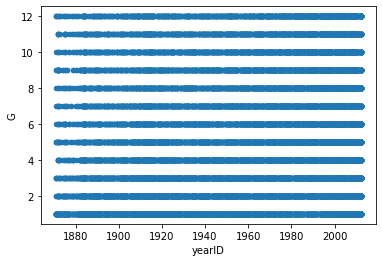

In [12]:
df.plot(kind = 'scatter',x='yearID' , y = 'G')
plt.show()

In [13]:
query = "SELECT playerID , yearID,teamID, G FROM [batting] where G < 6";
query

'SELECT playerID , yearID,teamID, G FROM [batting] where G < 6'

In [14]:
'SELECT playerID , yearID,teamID, G FROM [batting] where G < 6'

'SELECT playerID , yearID,teamID, G FROM [batting] where G < 6'

In [15]:
df = pd.read_sql(query,cnxn)

In [16]:
df.head()

,playerID,yearID,teamID,G
0,aardsda01,2012,NYA,1
1,abadan01,2001,OAK,1
2,abadan01,2006,CIN,5
3,abadijo01,1875,BR2,1
4,abbated01,1897,PHI,3


<AxesSubplot:>

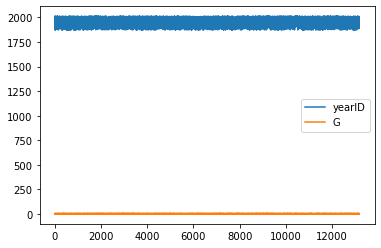

In [17]:
year = df[['yearID','G']]
year.plot()

In [18]:
year.describe()

,yearID,G
count,13181.000000,13181.000000
mean,1950.478188,2.737804
std,40.121368,1.415121
min,1871.000000,1.000000
25%,1915.000000,1.000000
50%,1951.000000,3.000000
75%,1988.000000,4.000000
max,2012.000000,5.000000
